# Monte Carlo

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

## Random Numbers

Il existe diffénrente méthode pour générer des nombres aléatoires suivent une certaine distribution à priori quelconque.

### Challenge 1

Voici un couple de "built-in" pour générer des nombres aléatoires suivent différentes distributions:

#### Distribution uniforme

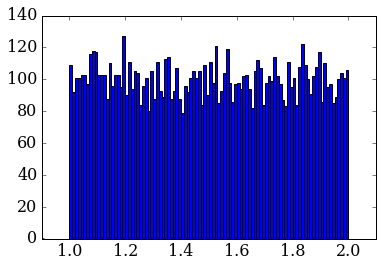

In [2]:
x=numpy.random.uniform(1, 2 , 10000)  #Nous restourne 10000 nombre aléatoire entre 1 et 2 suivent une distribution uniforme
binwidth=0.01
pyplot.xlim(0.9,2.1)
pyplot.hist(x,bins=numpy.arange(0.9,2.2, binwidth),normed=False);

#### Distribution en triangle

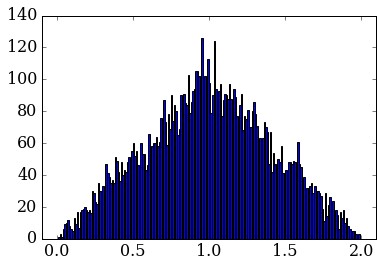

In [3]:
y=numpy.random.triangular(0, 1, 2 , 10000)  # génère 100 nombre aléatoir suivent un distribution triangulaire dont le sommet se trouve en 1, et les minimum en 0 et 2
binwidth=0.01
pyplot.xlim(-0.1,2.1)
pyplot.hist(y,bins=numpy.arange(-0.1,2.2, binwidth),normed=False);

Maintenant générons grace à des "built-in" des nombres aléatoires suivents une distribution Gaussiènne pour l'un et exponentielle pour l'autre dans le but de les comparer à ceux généré "à la main" par les methodes apprisent:

#### Gaussian

Voici le "built-in":

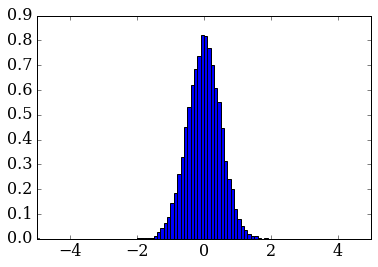

In [4]:
mu=0
sigma=1./2.
n=14000
x=numpy.random.normal(mu, sigma, n)

binwidth=0.1
pyplot.xlim(-5,5)
pyplot.hist(x,bins=numpy.arange(-5.,5.1, binwidth),normed=True);

Voici la méthode apprise:

A partir du distribution exponnentiel nous allons pouvoir générer un diribution gaussienne en éliminant (avec ne certaine probabilité) les nombres aléatoires de distribution exponnentiel qui ne correspondent pas à une distribution gaussienne.

Acceptance ratio: 0.7157
nombre d'élément 7157


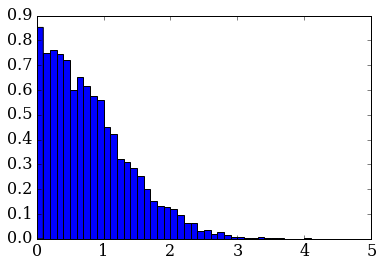

In [5]:
N=10000
# Distribute g according to the exponential distribution
uniform1 = numpy.random.random_sample(N)
g = numpy.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = numpy.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = numpy.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = numpy.extract(condition,g)

# Print the acceptance ratio
print("Acceptance ratio:",h.size/g.size)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

print("nombre d'élément", h.size)

Refaisons notre gaussienne mais uniquement avec les nombres positives ansi que les même paramètres que ci-dessus pour permettre la comparaison.  Remarque: le nombre d'élèment n'est pas forcément exactement le même.

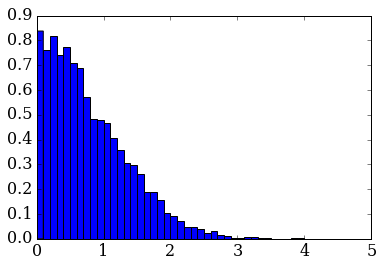

In [6]:
mu=0
sigma=1.
n=h.size*2
x=numpy.random.normal(mu, sigma, n)

binwidth=0.1
pyplot.xlim(0,5)
pyplot.hist(x,bins=numpy.arange(0.,5.1, binwidth),normed=True);

Les résultats sont similairs.

#### Exponential

Voici le "built-in":

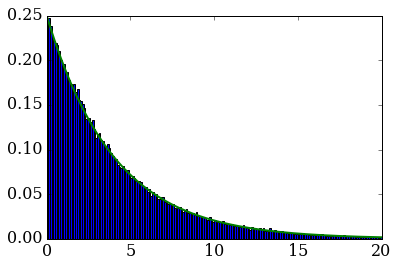

In [7]:
alpha=0.25
y=numpy.random.exponential(1/alpha, 100000)
inwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21, binwidth)
pyplot.hist(y,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

Voici la methode du cours:

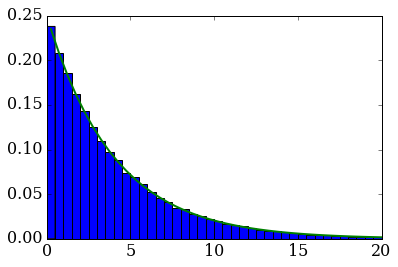

In [8]:
alpha = 0.25 # rate of the exponential distribution
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

#### Conclusion

Les résulats semblent être équivalent.  Les built-in à l'avantage d'être un peu plus rapide que le méthode de contruction "à la main".

### Challenge 2

#### Box–Muller algorithm

A partir de deux distributions uniformes on peut créé deux distributions gaussiennes grace à un changement de variable et une élimination de certain nombre aléatoire.


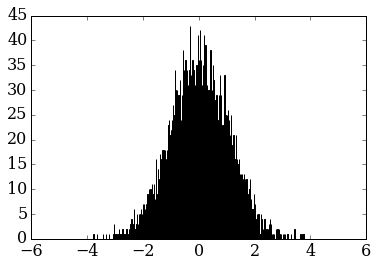

In [9]:
N=10000
a=1
b=-1


#création de listes pour ranger les nombres aléatoires suivents deux distributions gaussiennes
z0=[]
z1=[]


for i in range (N):
    x = numpy.random.random() #distribution uniforme entre 0 et 1
    x = (b - a) * x + a  #on change la distribution précente en une une distribution uniforme entre a et b
    y = numpy.random.random() #distribution uniforme entre 0 et 1
    y = (b - a) * y + a   #on change la distribution précente en une une distribution uniforme entre a et b
    s = x**2 + y**2  #on met x et y ensemble pour former un nouvel ensemble de nombre aléatoir de distribution circulaire
    if not(s >=1 or s is 0):
        z0=numpy.append(z0,x*((-2*numpy.log(s))/s)**(1/2))  #remplissage des listes basé sur un changement de variable
        z1=numpy.append(z1,y*((-2*numpy.log(s))/s)**(1/2))

        
binwidth=0.01
pyplot.xlim(-6,6)
pyplot.hist(z0,bins=numpy.arange(-6.,6.01, binwidth),normed=False);

## Mouvement Brownien

Ici nous voulons modéliser le déplacement d'une particule (d'encre par exemple) dans un fluide.  Ses déplacement sont due à sa vitesse initiale biensur, mais également (et c'est ça qui nous interesse) au choc avec les particule du millieux.  
Les particules du millieux on une vitesse qui suit une distribution gaussienne. 

Soit $ds$ le deplacement d'une particule d'encre sans vitesse initiale durant un temps $dt$ alors :
$$ds= \sqrt{2 \alpha dt } \mathcal{N}(0,1)$$
où $\alpha$ est le coefficient de diffusion et $\mathcal{N}(0,1)$ est un nombre aléatoire de distribution gaussienne.


### Challenge 1

Si maintenant on ajoute une vitesse initiale : $$ds= \sqrt{2 \alpha dt } \mathcal{N}(0,1) + c dt $$

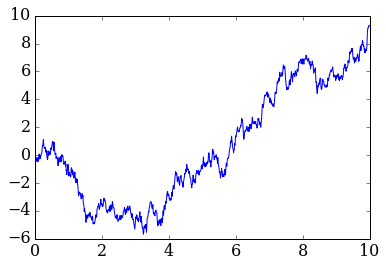

In [10]:
# Total simulation time
T=10.0

# Number of time steps and time interval dt
nt=1000
dt=T/nt
c=1

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

# Time integration (note the use of the numpy.random.normal function)
for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1) + c*dt

pyplot.plot(t,x)

In [11]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2


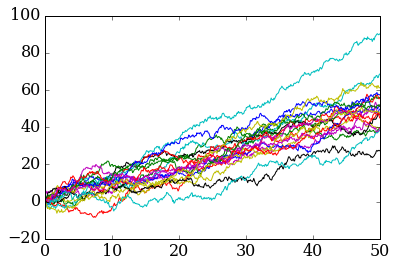

In [12]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)+c*dt

for i in range(20):
    pyplot.plot(t,x[:,i])

Ci-dessus se trouve l'évolution dans le temps des positions de plusieurs particules.  On voit qu'il y bien une diffusion et que celle-ci se fait par un phénomène aléatoire.  Le modèle à l'aire de faire ses preuves!

Maintenant nous allons comparer le résultats aux prédictions théorique de diffusion.

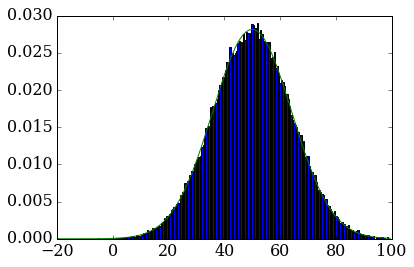

In [13]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-20,100,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2=2*alpha*T+sigma**2

pyplot.plot(bin_centers  , (numpy.exp(-(bin_centers-c*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2)) )

### Challenge 2

Avec de la friction:
$$ds=-\gamma x dt + \sqrt{2 \alpha dt } \mathcal{N}(0,1) $$

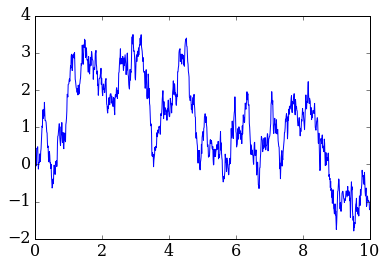

In [14]:
# Total simulation time
T=10.0

# Number of time steps and time interval dt
nt=1000
dt=T/nt
g=0.01

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

# Time integration (note the use of the numpy.random.normal function)
for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1) - g*x[i]*dt

pyplot.plot(t,x)

In [15]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2


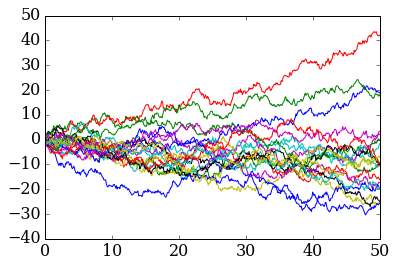

In [16]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)+g*x[i]*dt

for i in range(20):
    pyplot.plot(t,x[:,i])

La résolution théorique de ce problème est trop compliquer, par contre on se doute que la friction va diminuer $\sigma$ puisque la friction réduit la vitesse.  Nous avons donc rajouter un terme $\frac{\sigma^2}{g}$ à $\sigma_t^2$.  Cela ne suffit pas mais c'est pas trop loin.

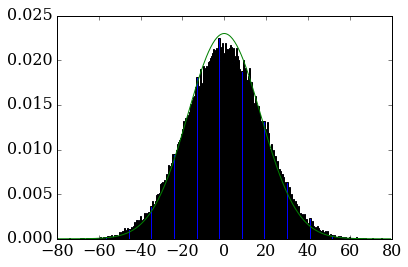

In [17]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-80,80,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2=2*alpha*T+sigma**2+(sigma**2)/g

pyplot.plot(bin_centers  , (numpy.exp(-(bin_centers)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2)) )

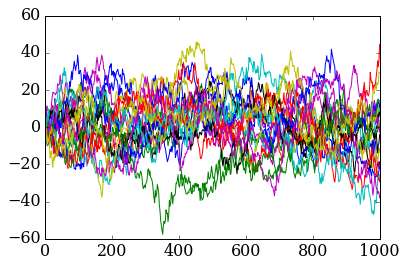

In [18]:
T=1000.0
nt=500
dt=T/nt
alpha=2.0
g=0.01

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)-g*x[i]*dt

for i in range(20):
    pyplot.plot(t,x[:,i])

## The Ising Model

Ici nous voulons modéliser les variations de spin dans un morceau de fer.  Comme le nombre de calcul à faire devient très vite grand, on utilise le model de Metropolis.
Soit un système composé de $nx*ny$ cellule de même grandeur.  Chaque cellule aura soit un spin up ($+\frac{1}{2}$) soit un spin down ($-\frac{1}{2}$) qu'on notera $s$.  L'energie d'un cellule $s(x,y)$ (ou $x$ et $y$ sont des valeur discrete allant respective de $0$ à $nx-1$ et de $0$ à $ny-1$) va dépendre de ses proches voisins et de la constante de de couplage $\alpha$ entre les spin: $$E_{cellule}=-\alpha s(x,y) \big(s(x-1,y)+s(x+1,y)+s(x,y-1)+s(x,y+1)\big).$$
Le principe est de changer des spin au hasard un certain nombre de fois (ce nombre est $NMC$) et de garder ce changement avec une certaine probabilité déterminé par la variation de l'énergie.  Plus la variation est favorable (baisse d'énergie), plus le nouveau spin à de probabilité d'être conservé.


In [19]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [20]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped - energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

###  Le petit challenge

In [21]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [22]:
nx=10
ny=10

In [23]:
sp=initial_state(nx,ny)
print (sp)

[[ 1 -1  1  1  1  1 -1  1 -1 -1]
 [ 1 -1 -1  1 -1  1 -1 -1  1  1]
 [ 1  1 -1 -1 -1 -1 -1  1 -1  1]
 [-1  1 -1 -1 -1  1  1  1 -1 -1]
 [ 1 -1  1 -1 -1 -1 -1  1 -1  1]
 [-1 -1 -1  1 -1  1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1 -1 -1  1]
 [-1 -1  1 -1  1 -1  1 -1 -1  1]
 [ 1  1  1 -1 -1 -1 -1  1 -1  1]
 [-1 -1  1  1 -1 -1  1  1  1  1]]


In [24]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[5,5]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,5,5)
    states[n]=sp[5,5]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)

0.0003401156393173679


In [25]:
print(energy_at_site(sp,alpha,-1,5,5))

-4.0


In [26]:
print(energy_at_site(sp,alpha,1,5,5))

4.0


In [27]:
def proba(ix, iy):
    E1=energy_at_site(sp,alpha,-1,ix,iy)
    E2=energy_at_site(sp,alpha,1,ix,iy)
    
    return print(numpy.exp(-(E2-E1)))

In [28]:
proba(5,5)

0.000335462627903


###  Back To The Ising Model

Imaginons que notre morceau de fer ai été completement magnétisé.

In [29]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

### Cahllenge 1

Quelle est la valeur critique de $\alpha$?

In [34]:
nx = 100    
ny = 100  #grandeur du système 


NMC=50  #nombre d'itération "ising model metropolis"

n=100  #nombre de alpha



In [44]:
def Energie(n,NMC,nx,ny):
    statesall=numpy.empty([n+1,nx,ny])
    for i in range(0,n+1):
        sp = numpy.ones([nx,ny])
        statesall[i,:,:] = ising_model_metropolis(sp, NMC, nx, ny, i*(1./n))[NMC,:,:]
    Energie=numpy.empty(n+1)
    alpha=numpy.empty(n+1)
    Mag=numpy.empty(n+1)
    for i in range(0,n+1):
        energie=0
        mag=0
        alpha[i]=i*(1./n)
        for ix in range(1,nx-1):
            for iy in range(1,ny-1):
                energie= energie + energy_at_site(statesall[i,:,:],alpha[i],statesall[i,ix,iy],ix,iy)
                mag=mag+statesall[i,ix,iy]
        Energie[i] = energie/((nx)*(ny))
        Mag[i]=mag/(nx*ny)
    return Energie,alpha,Mag                                                                                             
                                                                                

In [50]:
E,a,M=Energie(n,NMC,nx,ny)

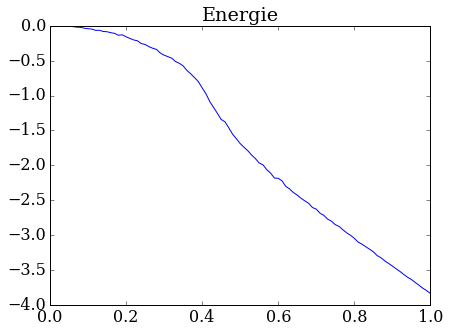

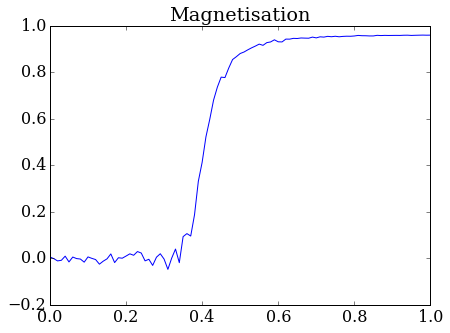

In [54]:

pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.plot(a,E)
pyplot.title("Energie")

pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.plot(a,M)
pyplot.title("Magnetisation")

On observe un changement brutale dans la courbe de magnétisation quand alpha vaut environ $0,35$.  Alpha critique vaut donc à peu pres $0,3.5$.

### Challenge 2

On peut appliquer cette même méthode pour des magnétisations initials quelconque:

array([[-1,  1, -1, ..., -1,  1, -1],
       [ 1,  1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ...,  1,  1, -1],
       ..., 
       [-1, -1,  1, ...,  1, -1,  1],
       [ 1, -1, -1, ...,  1, -1, -1],
       [ 1, -1, -1, ...,  1,  1,  1]])

In [56]:
def Energie2(n,NMC,nx,ny):
    statesall=numpy.empty([n+1,nx,ny])
    for i in range(0,n+1):
        sp = initial_state(nx,ny)
        initial=sp
        statesall[i,:,:] = ising_model_metropolis(sp, NMC, nx, ny, i*(1./n))[NMC,:,:]
    Energie=numpy.empty(n+1)
    alpha=numpy.empty(n+1)
    Mag=numpy.empty(n+1)
    for i in range(0,n+1):
        energie=0
        mag=0
        alpha[i]=i*(1./n)
        for ix in range(1,nx-1):
            for iy in range(1,ny-1):
                energie= energie + energy_at_site(statesall[i,:,:],alpha[i],statesall[i,ix,iy],ix,iy)
                mag=mag+statesall[i,ix,iy]
        Energie[i] = energie/((nx)*(ny))
        Mag[i]=mag/(nx*ny)
    return Energie,alpha,Mag,initial   

In [58]:
nx = 100    
ny = 100  #grandeur du système 


NMC=50  #nombre d'itération "ising model metropolis"

n=100  #nombre de alpha



In [59]:
E,a,M,i=Energie2(n,NMC,nx,ny)

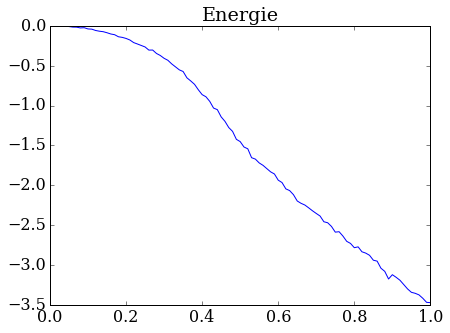

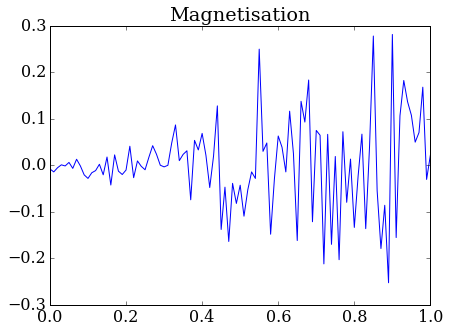

In [60]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.plot(a,E)
pyplot.title("Energie")

pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.plot(a,M)
pyplot.title("Magnetisation")

In [61]:
i

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ..., 
       [ 1,  1,  1, ..., -1, -1,  1],
       [ 1,  1,  1, ..., -1, -1,  1],
       [ 1,  1,  1, ..., -1,  1,  1]])